In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
df=pd.read_csv(r'C:\Users\escag\es_repo280720\Homework\Unit3\data\bikeshare.csv', parse_dates=['datetime'])

In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 850.6+ KB


In [4]:
#Split datetime into its components
from datetime import date, time, datetime

df['Date']=df['datetime'].dt.date
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month
df['Day']=df['datetime'].dt.day
df['DOW']=df['datetime'].dt.dayofweek
df['Hour']=df['datetime'].dt.hour

In [5]:
#Create a column tracking passing of time
df['time']= (df['datetime']- df['datetime'].min()).dt.days

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Date,Year,Month,Day,DOW,Hour,time
0,2011-01-01 00:00:00,Spring,0,0,Clear Skies,9.84,14.395,81,0.0,16,2011-01-01,2011,1,1,5,0,0
1,2011-01-01 01:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,40,2011-01-01,2011,1,1,5,1,0
2,2011-01-01 02:00:00,Spring,0,0,Clear Skies,9.02,13.635,80,0.0,32,2011-01-01,2011,1,1,5,2,0
3,2011-01-01 03:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,13,2011-01-01,2011,1,1,5,3,0
4,2011-01-01 04:00:00,Spring,0,0,Clear Skies,9.84,14.395,75,0.0,1,2011-01-01,2011,1,1,5,4,0


## Exploratory Data Analysis

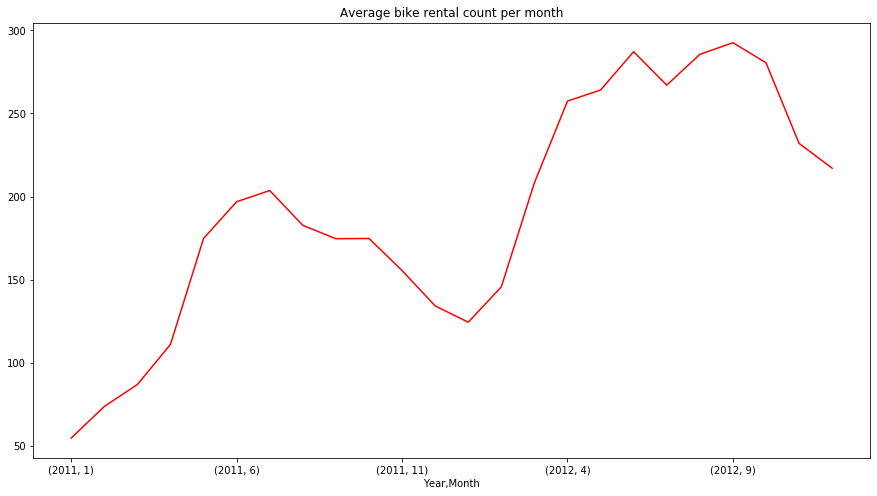

In [7]:
df.groupby(['Year', 'Month'])['count'].mean().plot( color='red', figsize=(15,8), title= 'Average bike rental count per month')

### Rental counts bar charts: Temperature, Humidity, Windspeed and Season

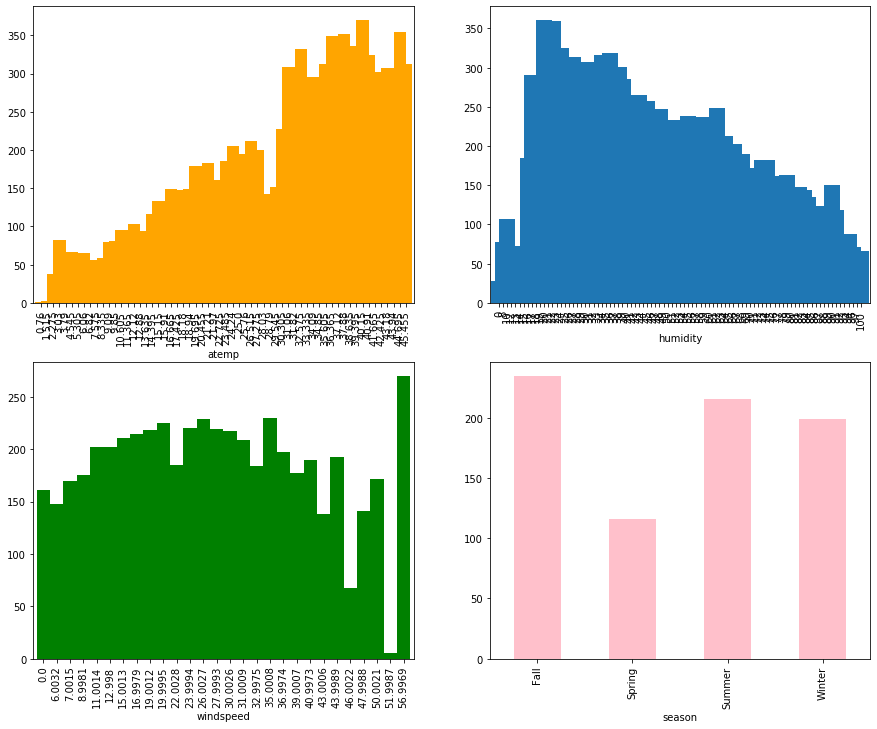

In [8]:
fig,axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=2)
plt.sca(axes[0][0])
atemp_count= df.groupby(['atemp'])['count'].mean()
atemp_count.plot(kind = 'bar', width=2, color='orange')

plt.sca(axes[0][1])
humidity_count= df.groupby(['humidity'])['count'].mean()
humidity_count.plot(kind = 'bar', width=4)

plt.sca(axes[1][0])
windspeed_count= df.groupby(['windspeed'])['count'].mean()
windspeed_count.plot(kind = 'bar', width=1, color='green')

plt.sca(axes[1][1])
season_count= df.groupby(['season'])['count'].mean()
season_count.plot(kind = 'bar', width=0.5, color='pink')

### Rental count and time-series

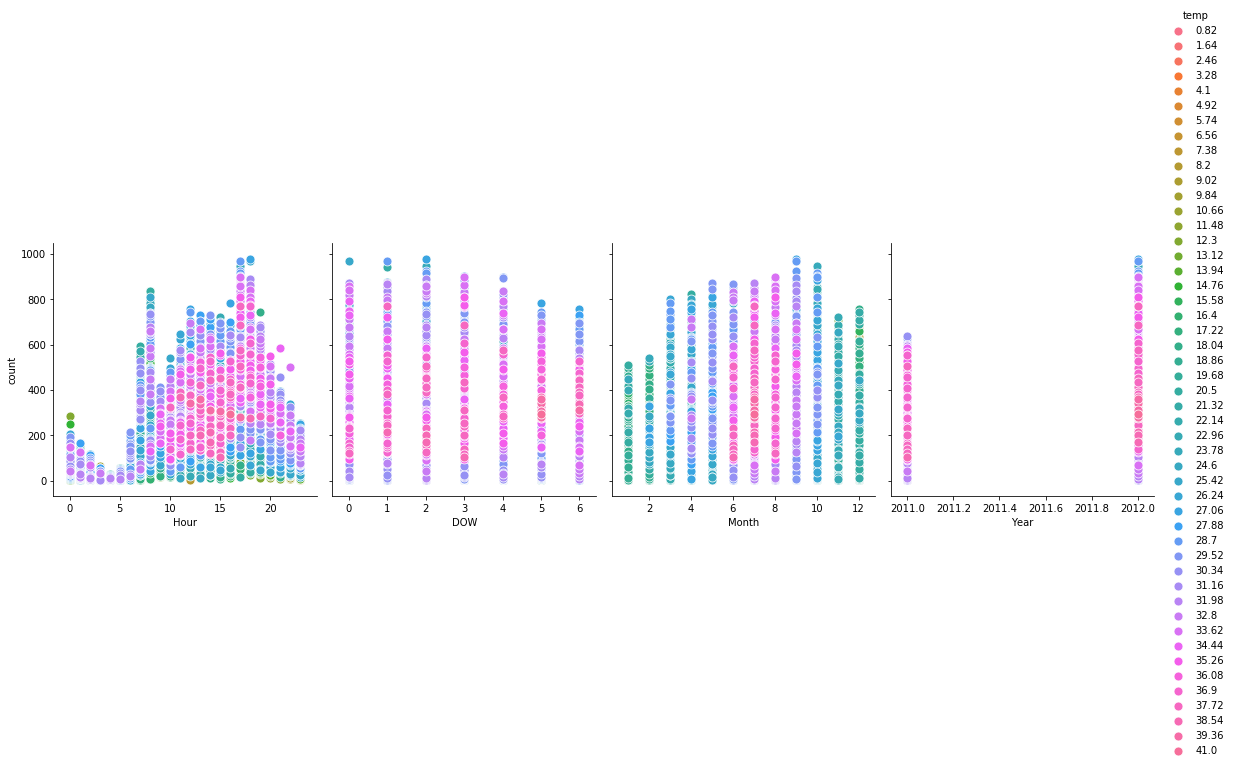

In [9]:
x_vars=[ 'Hour','DOW', 'Month','Year']
y_vars= ['count']
grid=sns.PairGrid(df, y_vars=y_vars, x_vars=x_vars, hue='temp', height=4 )
grid.map(sns.scatterplot, s=80  )
grid.add_legend()

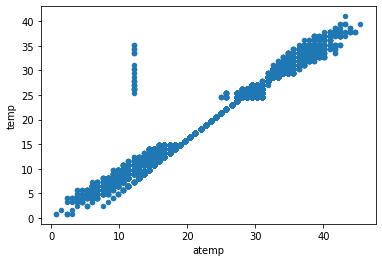

In [10]:
#Relationship between temperature and temperature it feels like outside (atemp)
#There are some anomalous values. Remove 'temp' from dataset
df.plot(x='atemp', y='temp', kind='scatter')

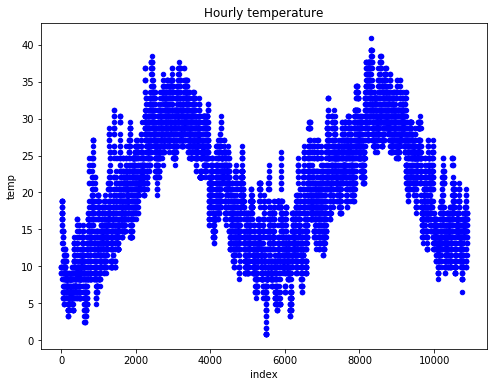

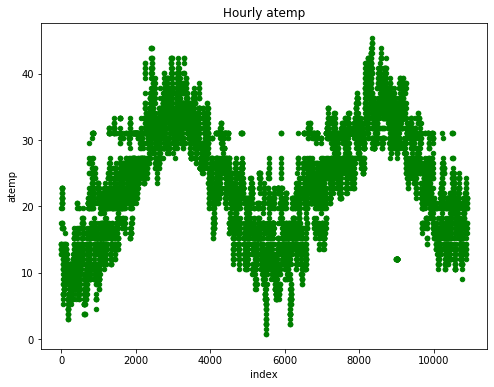

In [11]:
df=df.reset_index()
df.plot('index','temp', kind='scatter', color='blue', title="Hourly temperature", figsize=(8,6))
df.plot('index', 'atemp', kind='scatter', color='green', title="Hourly atemp", figsize=(8,6))
df.drop('index', inplace=True, axis=1)

In [12]:
df.drop('temp', axis=1, inplace=True)

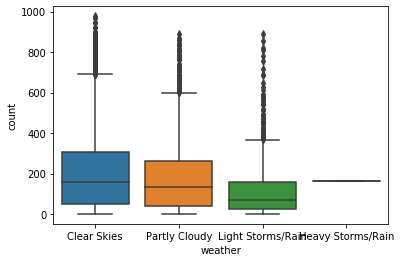

In [13]:
#fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12))
sns.boxplot(data=df, x='weather', y='count')
##Checking for outliers

### Average rentals/hour in 2011 and 2012

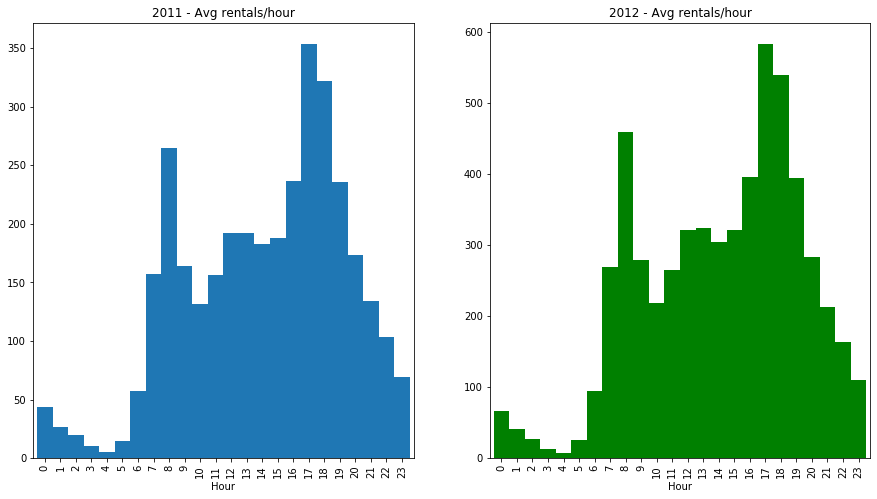

In [14]:
fig,axes = plt.subplots(figsize=(15, 8), nrows=1, ncols=2, )
plt.sca(axes[0])
count2011= df.loc[df.Year==2011, :].groupby(['Hour'])['count'].mean()
count2011.plot(kind = 'bar', width=1, title='2011 - Avg rentals/hour')

plt.sca(axes[1])
count2012= df.loc[df.Year==2012, :].groupby(['Hour'])['count'].mean()
count2012.plot(kind = 'bar', width=1,color='green', title='2012 - Avg rentals/hour')


### Average Rentals per weather conditions and Season

Text(0.5, 0, 'Term')

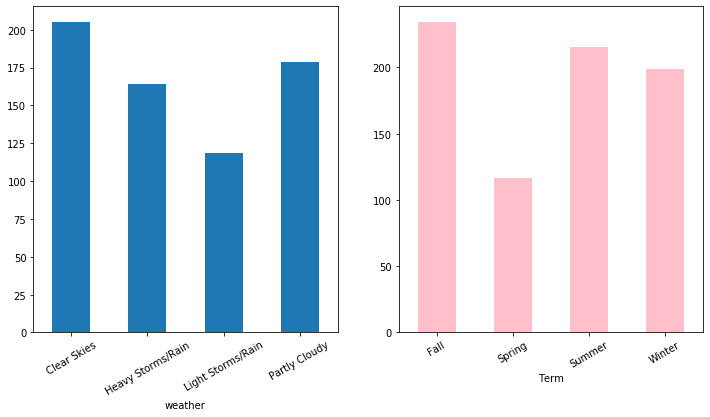

In [15]:
fig,axes = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
plt.sca(axes[0])
df.groupby(['weather'])['count'].mean().plot( kind='bar', width=0.5, rot=30)
plt.sca(axes[1])
df.groupby(['season'])['count'].mean().plot( kind='bar', width=0.5, color='pink',rot=30)
plt.xlabel('Term')

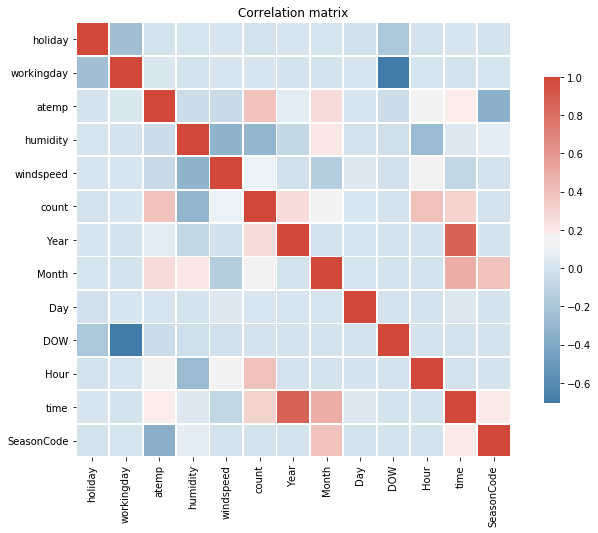

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['SeasonCode'] = LE.fit_transform(df['season'])

f, ax = plt.subplots(figsize=(12, 8))
corr_map = sns.diverging_palette(h_neg=240, h_pos=15, as_cmap=True)
sns.heatmap(df.corr(), cmap=corr_map,linewidths=0.8, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation matrix')
    
df.drop('SeasonCode', axis=1, inplace=True)

In [17]:
#Check for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
atemp         0
humidity      0
windspeed     0
count         0
Date          0
Year          0
Month         0
Day           0
DOW           0
Hour          0
time          0
dtype: int64

In [18]:
df.Day.max() #only Days 1 to 19 are collected each month

19

## Modelling the Data - GBR

In [19]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'atemp',
       'humidity', 'windspeed', 'count', 'Date', 'Year', 'Month', 'Day', 'DOW',
       'Hour', 'time'],
      dtype='object')

In [20]:
gbm=GradientBoostingRegressor()
import category_encoders as ce
ore = ce.OrdinalEncoder()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(ore,gbm)

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop('count', axis=1)
X.drop(['datetime', 'Date'], axis=1, inplace=True) #Date, once encoded, is similar to 'Time'
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [22]:
pipe.steps[1][1].set_params(max_depth=3, n_estimators=100,learning_rate=0.1 ) # starting parameters

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.8113333343858765

In [24]:
#look at feature importances
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [25]:
feats 

,Colums,Importance
11,Hour,0.650767
12,time,0.111345
4,atemp,0.104723
2,workingday,0.089031
5,humidity,0.019248
3,weather,0.014322
10,DOW,0.007287
8,Month,0.001392
6,windspeed,0.000674
9,Day,0.000673


## Feature Engineering

### Try to improve score by adding features to raw data 

In [26]:
#Add a column representing light/dark - different time intervals for each season/term
conditions = [
    (df['season'] =='Spring') & (df.Hour >8) & (df.Hour <17),
    (df['season'] == 'Summer') & (df.Hour >7) & (df.Hour <19),
    (df['season'] =='Fall') & (df.Hour >6) & (df.Hour <21),
    (df['season'] == 'Winter') & (df.Hour >7) & (df.Hour <18)]
results = [1,1,1,1]
df['Daylight'] = np.select(conditions, results, 0)

In [33]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [34]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.802647911475705

In [35]:
#Try if temperature and humidity combined improves the score
df['temp_humidity']=df.atemp*df.humidity

In [36]:
X = df.drop(['count',  'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [37]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.7922032518408904

In [38]:
# score didnt improve. Remove temp_humidity
df.drop('temp_humidity', axis=1, inplace=True)

In [39]:
#Try weather and humidity
di={'Clear Skies':1, 'Partly Cloudy': 2, 'Light Storms/Rain':3,
       'Heavy Storms/Rain':4}
df['weather_humidity']=df['weather'].map(di)*df['humidity']

In [40]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.7659727261840367

In [41]:
# score didnt improve. Remove temp_humidity
df.drop('weather_humidity', axis=1, inplace=True)

In [48]:
#temperature and windspeed combined
df['weatherattr']=df.atemp*(1/(df.windspeed+0.1))

In [49]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.7981045013537255

In [50]:
# score didnt improve. Remove temp_humidity
df.drop('weatherattr', axis=1, inplace=True)

In [51]:
X = df.drop(['count', 'datetime', 'Date'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.8028828306425245

In [52]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7791053575329078

### Time Shift

In [53]:
df=df.reset_index()
df=df.set_index('datetime')

In [55]:
#Shift one Day
df_1D=df.shift(1, freq='D')
df_1D.rename(columns={'count': 'count1D'},  inplace=True)
#Shift One Week
df_1W=df.shift(7, freq='D')
df_1W.rename(columns={'count': 'count1W'},  inplace=True)

In [56]:
df=df.merge(df_1D['count1D'], on='datetime',how='left' )
df=df.merge(df_1W['count1W'], on='datetime',how='left' )

In [57]:
df['count1Dpct']=(1-df['count1D']/df['count'])
df['count1Wpct']=(1-df['count1W']/df['count'])

In [58]:
#Replace missing values
missing_cols_query = df.isnull().sum() > 0
missing_cols_num = df.loc[:, missing_cols_query].select_dtypes(include=np.number).columns.tolist()

df[missing_cols_num] = df[missing_cols_num].fillna(0)


In [59]:
df=df.reset_index()

In [60]:
df.head()

,datetime,index,season,holiday,workingday,weather,atemp,humidity,windspeed,count,...,Month,Day,DOW,Hour,time,Daylight,count1D,count1W,count1Dpct,count1Wpct
0,2011-01-01 00:00:00,0,Spring,0,0,Clear Skies,14.395,81,0.0,16,...,1,1,5,0,0,0,0.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,Spring,0,0,Clear Skies,13.635,80,0.0,40,...,1,1,5,1,0,0,0.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,2,Spring,0,0,Clear Skies,13.635,80,0.0,32,...,1,1,5,2,0,0,0.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,3,Spring,0,0,Clear Skies,14.395,75,0.0,13,...,1,1,5,3,0,0,0.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,4,Spring,0,0,Clear Skies,14.395,75,0.0,1,...,1,1,5,4,0,0,0.0,0.0,0.0,0.0


In [61]:
X = df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = df['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9488516005946498

### Great improvement with the time shift

In [63]:
feats= pd.DataFrame({ 'Colums' : X.columns,
                     'Importance': pipe.steps[1][1].feature_importances_}).sort_values(by='Importance', ascending = False)

In [64]:
feats

,Colums,Importance
14,count1D,0.599530
16,count1Dpct,0.217880
11,Hour,0.089110
15,count1W,0.043614
9,Day,0.016162
12,time,0.011253
13,Daylight,0.007544
17,count1Wpct,0.007478
4,atemp,0.005528
5,humidity,0.001106


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_log_error,mean_squared_error, make_scorer
tscv=TimeSeriesSplit(n_splits=5)

In [78]:
X = df.drop(['count','datetime', 'Date', 'index'], axis=1)
y = df['count']

### Score the model using RMSLE

In [79]:
#Define a function to calculate the Root Mean Squared log Error 
def rmsle(y, y_pred):
    assert(y.shape == y_pred.shape)
    y_pred=y_pred.clip(min=0)
    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)

### Model parameters exploration to find best combination on the validation set

In [80]:
max_depth = [3,4,5]
learning_rate=[0.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv, scoring=rmsle_scorer)
            cv_scores.append((-scores.mean(), scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [81]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.30553987884778133, 0.061208356157300234, 5, 0.01, 1000),
 (0.3211677162430823, 0.025941451983845617, 5, 0.01, 500),
 (0.33860549509287163, 0.05335003097485811, 4, 0.01, 1000),
 (0.36007690128765973, 0.029220271263124882, 4, 0.01, 500),
 (0.39504277272785443, 0.17162323317145156, 4, 0.1, 100),
 (0.3959049977589749, 0.20905805340005376, 4, 0.1, 500),
 (0.4000587607557814, 0.20290387423341022, 5, 0.1, 100),
 (0.4051836874031706, 0.04364566323543577, 3, 0.1, 100),
 (0.41110987285265066, 0.0307756999638731, 3, 0.01, 1000),
 (0.41708968453074347, 0.20306017762993203, 4, 0.1, 1000),
 (0.4569952382930792, 0.27536275815598527, 5, 0.1, 1000),
 (0.4574325493684146, 0.27524010806785837, 5, 0.1, 500),
 (0.47397384300228484, 0.04133833546055114, 3, 0.01, 500),
 (0.5434008732085827, 0.3350059572137043, 3, 0.1, 500),
 (0.5605257641633731, 0.35289081373531506, 3, 0.1, 1000),
 (0.8881842572043119, 0.11831176075350511, 5, 0.01, 100),
 (0.9157810907379315, 0.11493565610475309, 4, 0.01, 100),
 (0.95815

In [82]:
pipe.steps[1][1].set_params(max_depth=5, n_estimators=1000, learning_rate=0.01)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9949499923738176

In [84]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [85]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9439064521501963

 **Root Mean Squared Log Error**

In [86]:
y_pred=pipe.predict(X_test,)
y_pred=y_pred.clip(min=0) #clip negative values
y_pred.max()

891.761879429966

In [87]:
from sklearn.metrics import mean_squared_log_error


In [88]:
rmsle_gbr=round(np.sqrt(mean_squared_log_error( y_test, y_pred )),3)

In [89]:
rmsle_gbr

0.589

## Use ln(count) to get more stable and non-negative predicted values

In [90]:
X = df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = np.log1p(df['count'])
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_train, X_val, y_train, y_val=  train_test_split(X_train, y_train, test_size=0.20, random_state=65, shuffle=False)

In [91]:
pipe.fit(X_train, y_train)
pipe.score(X_val, y_val) 

0.9854916737878875

In [92]:
#Define a function to calculate the Root Mean Squared log Error 
def rmsleL(y, y_pred):
    assert(y.shape == y_pred.shape)
    y = np.expm1(y)
    y_pred=np.expm1(y_pred)

    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorerL = make_scorer(rmsleL, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)

In [93]:
max_depth = [3,4,5]
learning_rate=[.01, .1]
num_trees =[100, 500, 1000]
cv_scores=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores =  cross_val_score(estimator=pipe, X=X_train, y =y_train, cv=tscv, scoring=rmsle_scorerL)
            cv_scores.append((-scores.mean(),scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 100
testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 100
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 4, rate: 0.01, trees: 100
testing model with: depth: 4, rate: 0.01, trees: 500
testing model with: depth: 4, rate: 0.01, trees: 1000
testing model with: depth: 4, rate: 0.1, trees: 100
testing model with: depth: 4, rate: 0.1, trees: 500
testing model with: depth: 4, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 100
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 100
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000


In [94]:
cv_scores.sort(key=lambda x: x[0])
cv_scores

[(0.2230077349669204, 0.07268249758584192, 5, 0.1, 500),
 (0.22325308583553122, 0.0738279300025912, 5, 0.1, 1000),
 (0.22450179962043695, 0.06602983061359233, 3, 0.1, 500),
 (0.2261242952638946, 0.07701784759029039, 5, 0.01, 1000),
 (0.22624427397930616, 0.07382533602379039, 4, 0.1, 1000),
 (0.22739036125498363, 0.07512702772604185, 3, 0.1, 1000),
 (0.22978729377788137, 0.06818399477970148, 4, 0.1, 500),
 (0.22980329387438486, 0.07130397706190493, 5, 0.1, 100),
 (0.244336121576753, 0.08320162962808698, 5, 0.01, 500),
 (0.2490173931949174, 0.0791187957537838, 4, 0.1, 100),
 (0.25092135685964784, 0.07718619552519387, 4, 0.01, 1000),
 (0.2641168795245462, 0.07394543475886889, 3, 0.01, 1000),
 (0.2695830430060039, 0.07564551450477856, 3, 0.1, 100),
 (0.28088257658831517, 0.08623879855548194, 4, 0.01, 500),
 (0.3312029148625212, 0.08699433312807837, 3, 0.01, 500),
 (0.6605685349601105, 0.07461876512435568, 5, 0.01, 100),
 (0.7121544710861304, 0.08169412093136094, 4, 0.01, 100),
 (0.77520925

In [95]:
pipe.steps[1][1].set_params(max_depth=5, n_estimators=500,learning_rate=0.1 )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
X_train=pd.concat([X_train, X_val], axis=0)
y_train=pd.concat([y_train, y_val], axis=0)

In [98]:
#Score on test data set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) 

0.9879172441799511

In [101]:
y_predlog=pipe.predict(X_test,)

In [102]:
y_predlog

array([3.09266702, 3.04691433, 4.50865917, ..., 5.16880234, 4.82371425,
       4.50480382])

In [103]:
y_predL=np.expm1(y_predlog)
y_testexp=np.expm1(y_test)

In [104]:
rmsle_ln=np.sqrt(mean_squared_log_error( y_testexp, y_predL ))

In [105]:
rmsle_ln

0.14934210289678776

In [106]:
X_test_pred=X_test.copy()
X_test_pred['Prediction']=pipe.predict(X_test)

X_test_pred = X_test_pred.merge(y_test, left_index=True, right_index=True)

X_test_pred['RPrediction']=np.expm1(X_test_pred['Prediction'])
X_test_pred['Rcount']=np.expm1(X_test_pred['count'])

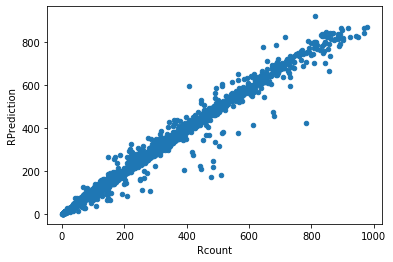

In [107]:
X_test_pred.plot(x='Rcount', y='RPrediction', kind='scatter')

In [108]:
X_test_pred=X_test_pred.reset_index()
X_test_pred

,index,season,holiday,workingday,weather,atemp,humidity,windspeed,Year,Month,...,time,Daylight,count1D,count1W,count1Dpct,count1Wpct,Prediction,count,RPrediction,Rcount
0,8708,Fall,0,0,Clear Skies,34.850,74,16.9979,2012,8,...,582,0,17.0,0.0,0.105263,0.000000,3.092667,2.995732,21.035769,19.0
1,8709,Fall,0,0,Clear Skies,34.850,79,16.9979,2012,8,...,582,0,49.0,0.0,-1.578947,0.000000,3.046914,2.995732,20.050290,19.0
2,8710,Fall,0,0,Clear Skies,35.605,74,19.9995,2012,8,...,582,1,67.0,0.0,0.014706,0.000000,4.508659,4.234107,89.799989,68.0
3,8711,Fall,0,0,Clear Skies,36.365,66,22.0028,2012,8,...,582,1,181.0,0.0,-0.675926,0.000000,4.721233,4.691348,111.306599,108.0
4,8712,Fall,0,0,Clear Skies,38.635,59,23.9994,2012,8,...,582,1,278.0,0.0,-0.213974,0.000000,5.468033,5.438079,235.993537,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,10881,Winter,0,1,Clear Skies,19.695,50,26.0027,2012,12,...,718,0,353.0,402.0,-0.050595,-0.196429,5.821629,5.820083,336.521284,336.0
2174,10882,Winter,0,1,Clear Skies,17.425,57,15.0013,2012,12,...,718,0,268.0,268.0,-0.112033,-0.112033,5.530090,5.488938,251.166585,241.0
2175,10883,Winter,0,1,Clear Skies,15.910,61,15.0013,2012,12,...,718,0,168.0,202.0,0.000000,-0.202381,5.168802,5.129899,174.704277,168.0
2176,10884,Winter,0,1,Clear Skies,17.425,61,6.0032,2012,12,...,718,0,132.0,122.0,-0.023256,0.054264,4.823714,4.867534,123.426384,129.0


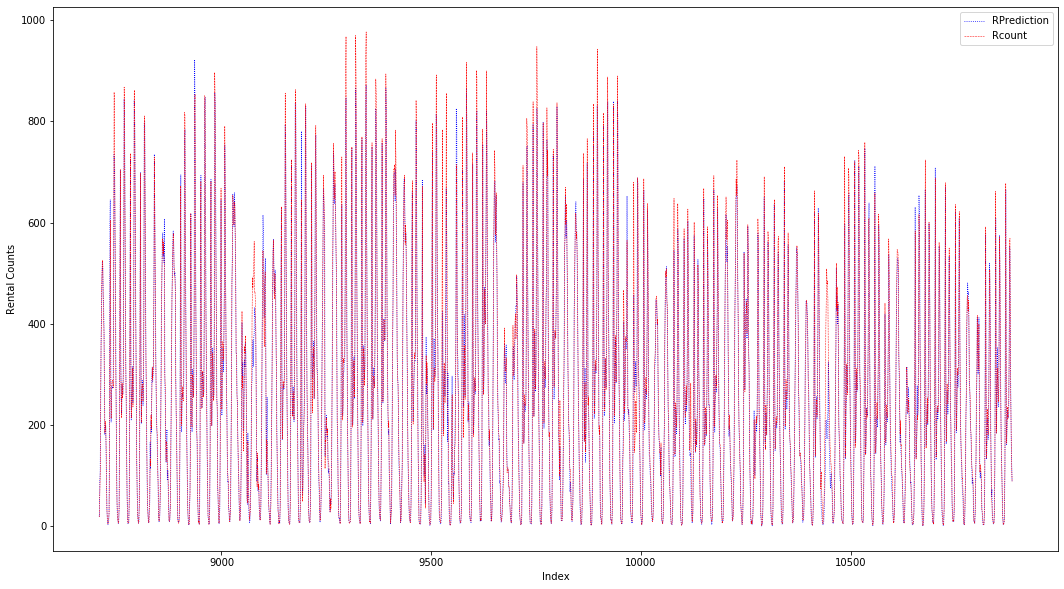

In [109]:
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'RPrediction', data=X_test_pred, linewidth=0.8, color='b', linestyle=':')
ax.plot('index', 'Rcount', data=X_test_pred , linewidth=0.5, color='r', ls='--')
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [110]:
X_test_pred['error']=X_test_pred['Rcount']-X_test_pred['RPrediction']
X_test_pred['error_pc']=X_test_pred['error']/X_test_pred['Rcount']
print(X_test_pred['error_pc'].min(), " ", X_test_pred['error_pc'].max(),X_test_pred['error_pc'].mean() )

-0.8912343193336618   0.7608741309344222 0.026728816426439154


## XGBoost 

In [111]:
import xgboost as xgb
from category_encoders import OrdinalEncoder
from utils import extract_dates, get_val_scores

In [122]:
mod3=xgb.XGBRegressor()
mod3.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [123]:
pipe2=make_pipeline(OrdinalEncoder(), mod3)

In [124]:
pipe2.steps[1][1].get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)>

In [125]:
pipe2.steps[1][1].set_params(learning_rate=0.1)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [126]:
X=df.drop(['count', 'datetime', 'Date', 'index'], axis=1)
y = df['count']
X_trn, X_tst, y_trn, y_tst=train_test_split(X,y, test_size=0.20, random_state=65, shuffle=False)
X_trn, X_val, y_trn, y_val=train_test_split(X_trn,y_trn, test_size=0.20, random_state=65, shuffle=False)

In [127]:
scores = get_val_scores(pipe2, X_trn, y_trn, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=True)

In [128]:
scores

{'validation_score': 0.9314109488615824,
 'fold_scores': array([0.80518428, 0.93883549, 0.96642175, 0.97467574, 0.97193747]),
 'test_score': 0.9312269858105839}

In [129]:
feats=pd.DataFrame({'Importance': pipe2.steps[1][1].feature_importances_, 'Column': X.columns}).sort_values(by='Importance', ascending=False)

In [130]:
feats

,Importance,Column
14,0.398183,count1D
16,0.135924,count1Dpct
11,0.121631,Hour
0,0.075089,season
13,0.063853,Daylight
15,0.047805,count1W
8,0.028411,Month
12,0.025500,time
9,0.024464,Day
2,0.017307,workingday


In [131]:
max_depth = [3,5,7]
learning_rate=[.01, .1, .3]
num_trees =[500, 1000]
scores_list=[]
for depth in max_depth:
    for rate in learning_rate:
        for tree in num_trees:
            print(f"testing model with: depth: {depth}, rate: {rate}, trees: {tree}")
            pipe2.steps[1][1].set_params(max_depth=depth, learning_rate=rate, n_estimators=tree)
            scores = cross_val_score(estimator=pipe2, X=X_trn, y =y_trn, cv=tscv, scoring=rmsle_scorer)
           # scores = get_val_scores(pipe2, X_trn, y_trn, return_test_score=True, random_state=65, randomize=False, use_kfold=True, cv=tscv, return_folds=False)
            #scores_list.append((scores['test_score'], depth, rate, tree))
            scores_list.append((-scores.mean(),scores.std(), depth, rate, tree))

testing model with: depth: 3, rate: 0.01, trees: 500
testing model with: depth: 3, rate: 0.01, trees: 1000
testing model with: depth: 3, rate: 0.1, trees: 500
testing model with: depth: 3, rate: 0.1, trees: 1000
testing model with: depth: 3, rate: 0.3, trees: 500
testing model with: depth: 3, rate: 0.3, trees: 1000
testing model with: depth: 5, rate: 0.01, trees: 500
testing model with: depth: 5, rate: 0.01, trees: 1000
testing model with: depth: 5, rate: 0.1, trees: 500
testing model with: depth: 5, rate: 0.1, trees: 1000
testing model with: depth: 5, rate: 0.3, trees: 500
testing model with: depth: 5, rate: 0.3, trees: 1000
testing model with: depth: 7, rate: 0.01, trees: 500
testing model with: depth: 7, rate: 0.01, trees: 1000
testing model with: depth: 7, rate: 0.1, trees: 500
testing model with: depth: 7, rate: 0.1, trees: 1000
testing model with: depth: 7, rate: 0.3, trees: 500
testing model with: depth: 7, rate: 0.3, trees: 1000


In [132]:
scores_list.sort(key=lambda x: x[0])
scores_list

[(0.29264712826962647, 0.05242023662648063, 7, 0.01, 500),
 (0.29831212808156693, 0.07016943807201433, 7, 0.01, 1000),
 (0.30011591157979073, 0.0743411379264486, 7, 0.1, 500),
 (0.30139781358214457, 0.07404997519789722, 7, 0.1, 1000),
 (0.33065747034211973, 0.05590865969403066, 5, 0.01, 1000),
 (0.34169823247454, 0.06730722376639145, 7, 0.3, 1000),
 (0.3417640013193638, 0.06727161678867087, 7, 0.3, 500),
 (0.34415189667606866, 0.03695564307165208, 5, 0.01, 500),
 (0.3560339395777233, 0.10833910710097175, 5, 0.1, 500),
 (0.37160084800297655, 0.1173724521901814, 5, 0.1, 1000),
 (0.3942207648985538, 0.05764303376818256, 3, 0.1, 500),
 (0.4022109697775994, 0.061769398011673686, 3, 0.1, 1000),
 (0.42539358687530315, 0.07791866239195129, 5, 0.3, 500),
 (0.42841469549756084, 0.07664254862017514, 5, 0.3, 1000),
 (0.45408705539694, 0.02742555609744845, 3, 0.01, 1000),
 (0.4579505961513268, 0.071454548268123, 3, 0.3, 500),
 (0.48370250051548674, 0.09046739627863769, 3, 0.3, 1000),
 (0.4994418155

In [133]:
pipe2.steps[1][1].set_params(max_depth=7, n_estimators=500,learning_rate=0.01 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [134]:
X_trn=pd.concat([X_trn, X_val], axis=0)
y_trn=pd.concat([y_trn, y_val], axis=0)

In [135]:
#Score on test data set
pipe2.fit(X_trn, y_trn)
pipe2.score(X_tst, y_tst) 

0.9739715012210618

In [136]:
X_pred=X_tst.copy()
X_pred['Prediction']=pipe2.predict(X_tst)

X_pred = X_pred.merge(y_tst, left_index=True, right_index=True)
X_pred['Prediction']=(X_pred['Prediction'])
X_pred['count']=(X_pred['count'])

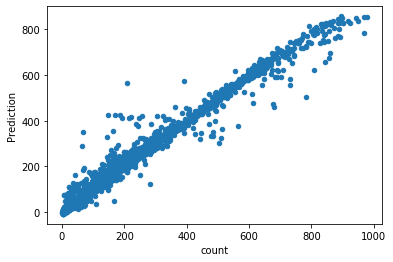

In [137]:
X_pred.plot(x='count', y='Prediction', kind='scatter')

In [138]:
X_pred['error']=X_pred['count']-X_pred['Prediction']
X_pred['error_pc']=X_pred['error']/X_pred['count']
print(X_pred['error_pc'].min(), " ",X_pred['error_pc'].max())

-11.530867258707682   5.117868423461914


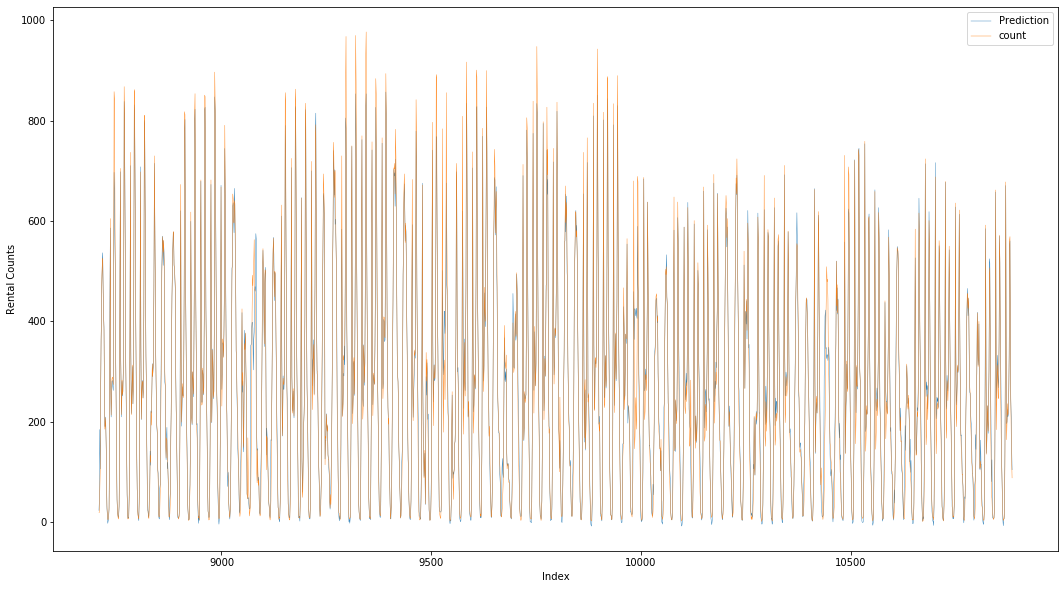

In [139]:
X_pred=X_pred.reset_index()
fig, ax = plt.subplots(1, figsize=(18, 10))
ax.plot('index', 'Prediction', data=X_pred, linewidth=0.4)
ax.plot('index', 'count', data=X_pred , linewidth=0.4)
plt.xlabel('Index')
plt.ylabel('Rental Counts')
plt.legend()
plt.show()

In [141]:
y_pred_xgb=pipe2.predict(X_tst)


In [142]:
y_pred_xgb.min()

-8.111713

In [143]:
y_pred_xgb=y_pred_xgb.clip(min=0) #clip negative values
y_pred_xgb.max()

857.2368

In [144]:
rmsle_xgb=round(np.sqrt(mean_squared_log_error( y_tst, y_pred_xgb )),3)

In [151]:
pd.options.display.float_format = "{:,.3f}".format

In [153]:
lst=[rmsle_gbr, rmsle_ln, rmsle_xgb]

rmsle_df=pd.DataFrame(lst, index=['GBR', 'GBRLog', 'XGBoost'])
rmsle_df.columns= [' RMSLE ']
rmsle_df

,RMSLE
GBR,0.589
GBRLog,0.149
XGBoost,0.409


**Comments**: \
    Adding a column with daly time shift gave much better scores, \
    Use ln(counts) to improve accuracy of the predicive model, \
    Next: try XGBoost with ln(count)
    

**References**:
    https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a,    
    https://www.kaggle.com/hmavrodiev/bike-sharing-prediction-rf-xgboost
    
        